In [1]:
from matplotlib.font_manager import FontProperties
from transformers import AutoTokenizer
from constants import *

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json
import os

In [2]:
RESULTS_FOLDER = "results"
INTERPRETABILITY = "feature_ablation"
INTERPRETABILITY_SOURCE_FOLDER = os.path.join(RESULTS_FOLDER, INTERPRETABILITY)
VISUALIZATIONS_FOLDER = os.path.join(RESULTS_FOLDER, "visualizations")
MODEL = "yicoder9b"
TASK = "logic_ops"
MONOSPACE = FontProperties(family='monospace')
CMAP = "RdBu"
# CMAP = "RdYlGn"
ROBUST = False
TOKENIZER = AutoTokenizer.from_pretrained(HUGGINGFACE_TAGS[MODEL], token=True)

In [3]:
def snake_to_capitalize(text):
    text = text.split("_")
    return " ".join([word.capitalize() for word in text])

In [4]:
def crop_text(text, max_len):
    crop_len = 50
    if max_len <= crop_len:
        return text.ljust(max_len)
    else:
        if len(text) <= crop_len:
            return text.ljust(crop_len)
        return f"{text[:crop_len - 4]} ..."

In [5]:
def split_list_by_newline(string_list, attr_list):
    result1 = []
    result2 = []
    current_sublist = []
    current_subattr_list = []

    for item, attr in zip(string_list, attr_list):
        if item == "\n":
            current_sublist.append(item)
            current_subattr_list.append(attr)
            if current_sublist:  # Only append if sublist is not empty
                result1.append(current_sublist)
                result2.append(np.sum(current_subattr_list, axis=0).tolist())
                current_sublist = []
                current_subattr_list = []
        else:
            current_sublist.append(item)
            current_subattr_list.append(attr)
    if current_sublist:
        result1.append(current_sublist)
        result2.append(np.sum(current_subattr_list, axis=0).tolist())

    return result1, result2

3.1797341837591446


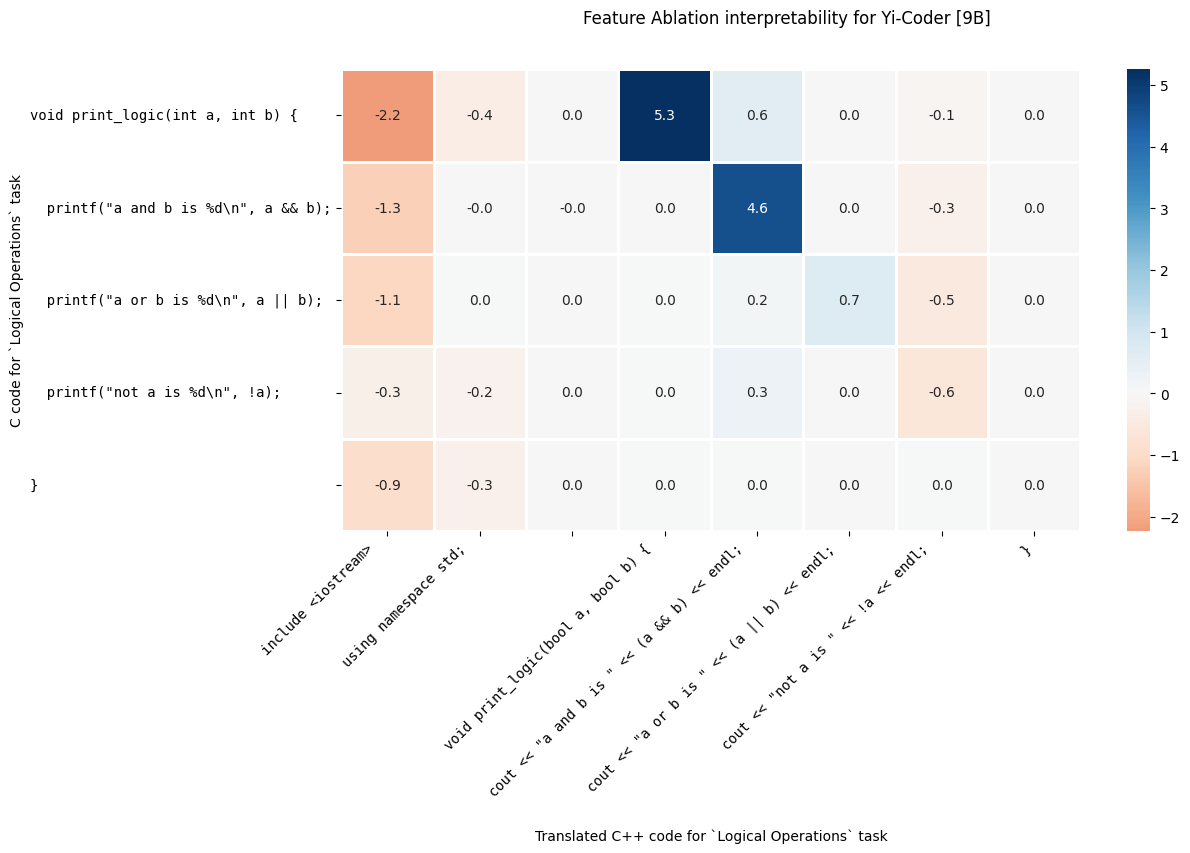

In [6]:
lang1 = list(LANGS.keys())[0]
lang2 = list(LANGS.keys())[1]
input_tokens = None
filename = f"{MODEL}-{TASK}-{lang1.lower()}-{lang2.lower()}.json"
filename = os.path.join(INTERPRETABILITY_SOURCE_FOLDER, filename)
results = json.load(open(filename, "r"))
if input_tokens is None:
    max_len = max([len(s) for s in results["input_tokens"]])
    input_tokens = [
        crop_text(s.encode("ascii", errors="ignore").decode(), max_len)
        for s in results["input_tokens"]
    ]
output_tokens = results["output_tokens"]
token_attrs = results["token_attr"]
output_tokens, token_attrs = split_list_by_newline(output_tokens, token_attrs)
output_tokens = [TOKENIZER.convert_tokens_to_string(x) for x in output_tokens]
data = pd.DataFrame(token_attrs).T
data.columns = output_tokens
data.index = input_tokens
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
_ = sns.heatmap(
    data,
    center=0,
    robust=ROBUST,
    cmap=CMAP,
    annot=True,
    fmt=".1f",
    linewidths=1,
    square=True,
    ax=ax,
)
_ = ax.set_xlabel(f"Translated {LANGS[lang2]} code for `{TASKS[TASK]}` task")
_ = ax.set_xticklabels(
    ax.get_xticklabels(), fontproperties=MONOSPACE, rotation=45, ha="right"
)
_ = ax.set_ylabel(f"{LANGS[lang1]} code for `{TASKS[TASK]}` task")
_ = ax.set_yticklabels(ax.get_yticklabels(), fontproperties=MONOSPACE)
fig.suptitle(
    f"{snake_to_capitalize(INTERPRETABILITY)} interpretability for {MODELS[MODEL]}"
)
print(data.iloc[0].values.sum())

5.171038489849074


/Users/nbthakur/Code/explainability-of-llms-in-code-conversion-tasks/venv/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/nbthakur/Code/explainability-of-llms-in-code-conversion-tasks/venv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans Mono.
  func(*args, **kwargs)
/Users/nbthakur/Code/explainability-of-llms-in-code-conversion-tasks/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


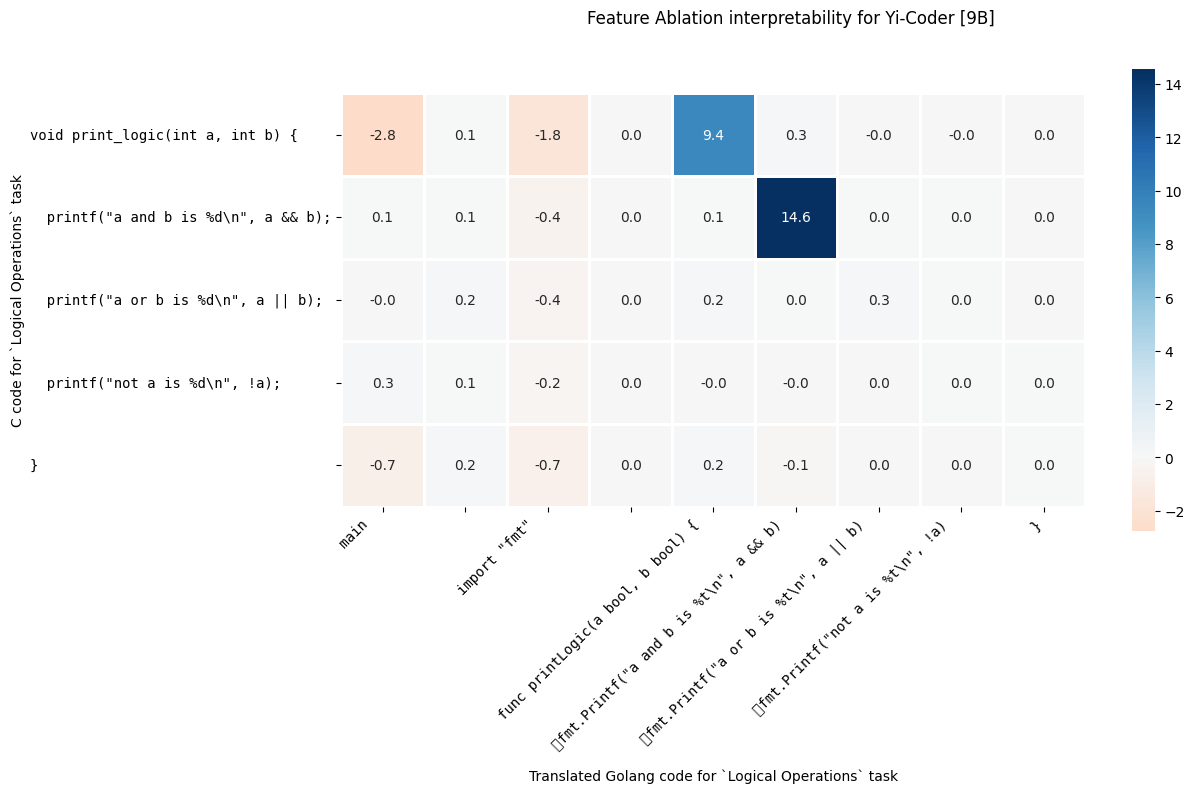

In [7]:
lang1 = list(LANGS.keys())[0]
lang2 = list(LANGS.keys())[2]
input_tokens = None
filename = f"{MODEL}-{TASK}-{lang1.lower()}-{lang2.lower()}.json"
filename = os.path.join(INTERPRETABILITY_SOURCE_FOLDER, filename)
results = json.load(open(filename, "r"))
if input_tokens is None:
    max_len = max([len(s) for s in results["input_tokens"]])
    input_tokens = [
        crop_text(s.encode("ascii", errors="ignore").decode(), max_len)
        for s in results["input_tokens"]
    ]
output_tokens = results["output_tokens"]
token_attrs = results["token_attr"]
output_tokens, token_attrs = split_list_by_newline(output_tokens, token_attrs)
output_tokens = [TOKENIZER.convert_tokens_to_string(x) for x in output_tokens]
data = pd.DataFrame(token_attrs).T
data.columns = output_tokens
data.index = input_tokens
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
_ = sns.heatmap(
    data,
    center=0,
    robust=ROBUST,
    cmap=CMAP,
    annot=True,
    fmt=".1f",
    linewidths=1,
    square=True,
    ax=ax,
)
_ = ax.set_xlabel(f"Translated {LANGS[lang2]} code for `{TASKS[TASK]}` task")
_ = ax.set_xticklabels(
    ax.get_xticklabels(), fontproperties=MONOSPACE, rotation=45, ha="right"
)
_ = ax.set_ylabel(f"{LANGS[lang1]} code for `{TASKS[TASK]}` task")
_ = ax.set_yticklabels(ax.get_yticklabels(), fontproperties=MONOSPACE)
fig.suptitle(
    f"{snake_to_capitalize(INTERPRETABILITY)} interpretability for {MODELS[MODEL]}"
)
print(data.iloc[0].values.sum())

13.4249353249526


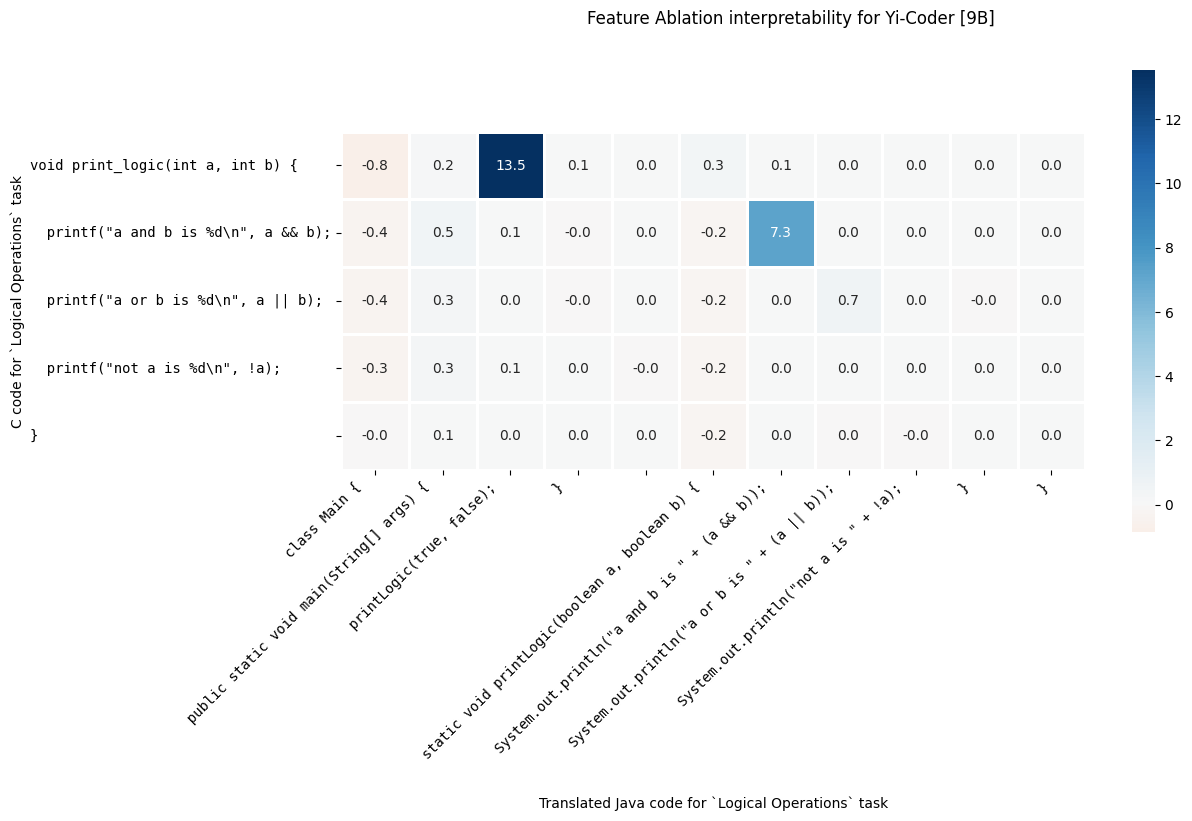

In [8]:
lang1 = list(LANGS.keys())[0]
lang2 = list(LANGS.keys())[3]
input_tokens = None
filename = f"{MODEL}-{TASK}-{lang1.lower()}-{lang2.lower()}.json"
filename = os.path.join(INTERPRETABILITY_SOURCE_FOLDER, filename)
results = json.load(open(filename, "r"))
if input_tokens is None:
    max_len = max([len(s) for s in results["input_tokens"]])
    input_tokens = [
        crop_text(s.encode("ascii", errors="ignore").decode(), max_len)
        for s in results["input_tokens"]
    ]
output_tokens = results["output_tokens"]
token_attrs = results["token_attr"]
output_tokens, token_attrs = split_list_by_newline(output_tokens, token_attrs)
output_tokens = [TOKENIZER.convert_tokens_to_string(x) for x in output_tokens]
data = pd.DataFrame(token_attrs).T
data.columns = output_tokens
data.index = input_tokens
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
_ = sns.heatmap(
    data,
    center=0,
    robust=ROBUST,
    cmap=CMAP,
    annot=True,
    fmt=".1f",
    linewidths=1,
    square=True,
    ax=ax,
)
_ = ax.set_xlabel(f"Translated {LANGS[lang2]} code for `{TASKS[TASK]}` task")
_ = ax.set_xticklabels(
    ax.get_xticklabels(), fontproperties=MONOSPACE, rotation=45, ha="right"
)
_ = ax.set_ylabel(f"{LANGS[lang1]} code for `{TASKS[TASK]}` task")
_ = ax.set_yticklabels(ax.get_yticklabels(), fontproperties=MONOSPACE)
fig.suptitle(
    f"{snake_to_capitalize(INTERPRETABILITY)} interpretability for {MODELS[MODEL]}"
)
print(data.iloc[0].values.sum())

4.895211146716029


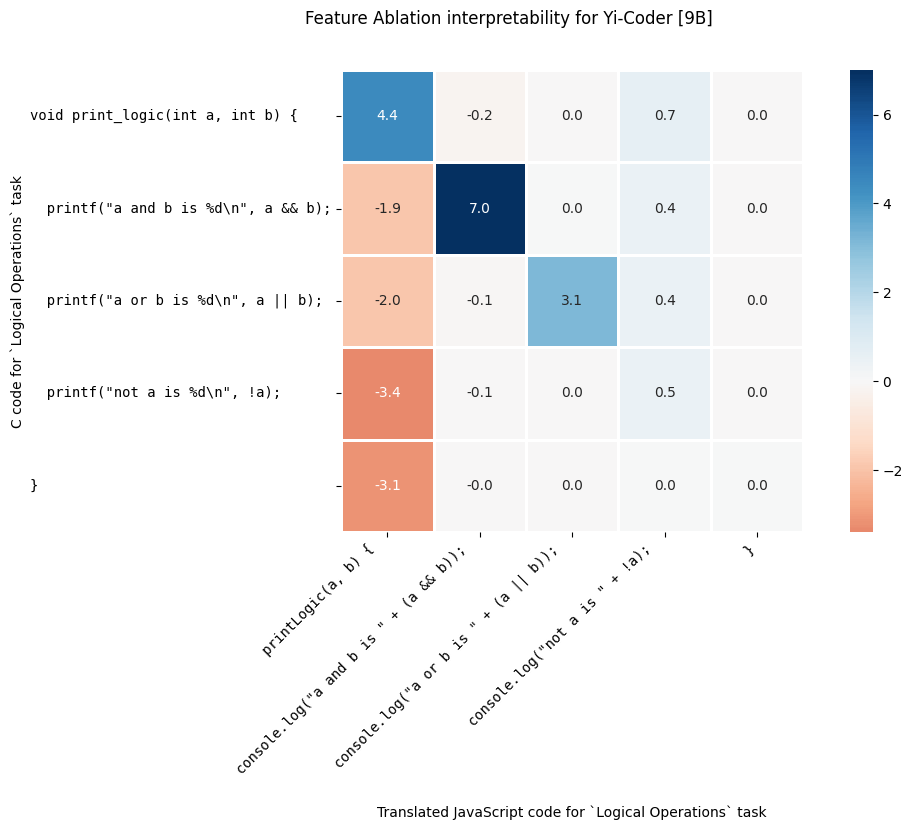

In [9]:
lang1 = list(LANGS.keys())[0]
lang2 = list(LANGS.keys())[4]
input_tokens = None
filename = f"{MODEL}-{TASK}-{lang1.lower()}-{lang2.lower()}.json"
filename = os.path.join(INTERPRETABILITY_SOURCE_FOLDER, filename)
results = json.load(open(filename, "r"))
if input_tokens is None:
    max_len = max([len(s) for s in results["input_tokens"]])
    input_tokens = [
        crop_text(s.encode("ascii", errors="ignore").decode(), max_len)
        for s in results["input_tokens"]
    ]
output_tokens = results["output_tokens"]
token_attrs = results["token_attr"]
output_tokens, token_attrs = split_list_by_newline(output_tokens, token_attrs)
output_tokens = [TOKENIZER.convert_tokens_to_string(x) for x in output_tokens]
data = pd.DataFrame(token_attrs).T
data.columns = output_tokens
data.index = input_tokens
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
_ = sns.heatmap(
    data,
    center=0,
    robust=ROBUST,
    cmap=CMAP,
    annot=True,
    fmt=".1f",
    linewidths=1,
    square=True,
    ax=ax,
)
_ = ax.set_xlabel(f"Translated {LANGS[lang2]} code for `{TASKS[TASK]}` task")
_ = ax.set_xticklabels(
    ax.get_xticklabels(), fontproperties=MONOSPACE, rotation=45, ha="right"
)
_ = ax.set_ylabel(f"{LANGS[lang1]} code for `{TASKS[TASK]}` task")
_ = ax.set_yticklabels(ax.get_yticklabels(), fontproperties=MONOSPACE)
fig.suptitle(
    f"{snake_to_capitalize(INTERPRETABILITY)} interpretability for {MODELS[MODEL]}"
)
print(data.iloc[0].values.sum())

5.3613676985987695


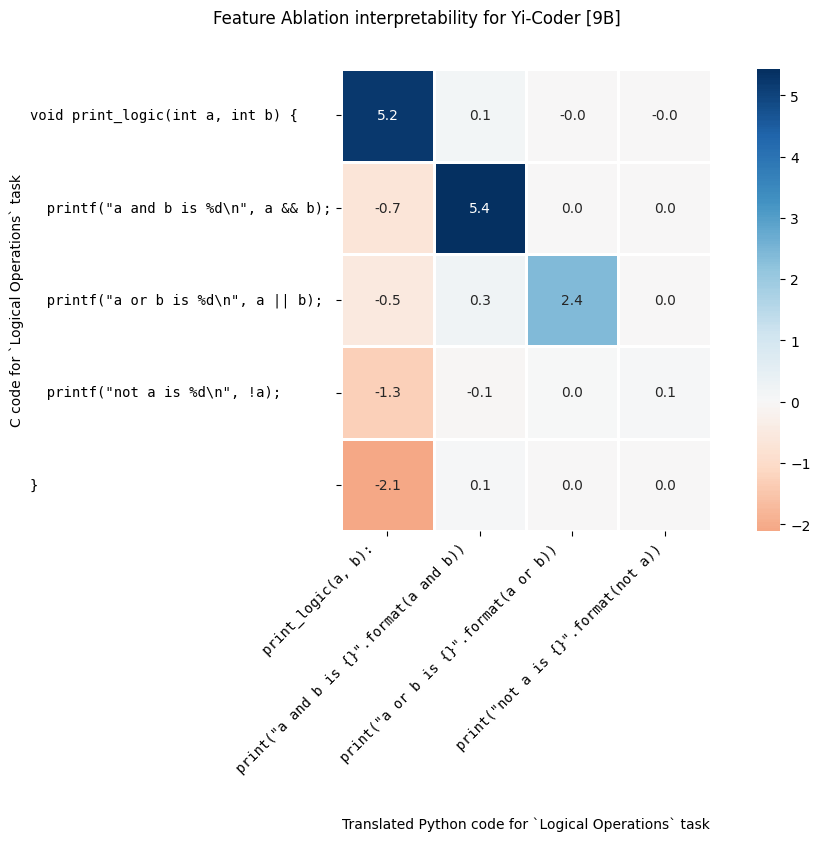

In [10]:
lang1 = list(LANGS.keys())[0]
lang2 = list(LANGS.keys())[5]
input_tokens = None
filename = f"{MODEL}-{TASK}-{lang1.lower()}-{lang2.lower()}.json"
filename = os.path.join(INTERPRETABILITY_SOURCE_FOLDER, filename)
results = json.load(open(filename, "r"))
if input_tokens is None:
    max_len = max([len(s) for s in results["input_tokens"]])
    input_tokens = [
        crop_text(s.encode("ascii", errors="ignore").decode(), max_len)
        for s in results["input_tokens"]
    ]
output_tokens = results["output_tokens"]
token_attrs = results["token_attr"]
output_tokens, token_attrs = split_list_by_newline(output_tokens, token_attrs)
output_tokens = [TOKENIZER.convert_tokens_to_string(x) for x in output_tokens]
data = pd.DataFrame(token_attrs).T
data.columns = output_tokens
data.index = input_tokens
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
_ = sns.heatmap(
    data,
    center=0,
    robust=ROBUST,
    cmap=CMAP,
    annot=True,
    fmt=".1f",
    linewidths=1,
    square=True,
    ax=ax,
)
_ = ax.set_xlabel(f"Translated {LANGS[lang2]} code for `{TASKS[TASK]}` task")
_ = ax.set_xticklabels(
    ax.get_xticklabels(), fontproperties=MONOSPACE, rotation=45, ha="right"
)
_ = ax.set_ylabel(f"{LANGS[lang1]} code for `{TASKS[TASK]}` task")
_ = ax.set_yticklabels(ax.get_yticklabels(), fontproperties=MONOSPACE)
fig.suptitle(
    f"{snake_to_capitalize(INTERPRETABILITY)} interpretability for {MODELS[MODEL]}"
)
print(data.iloc[0].values.sum())

2.629726297610688


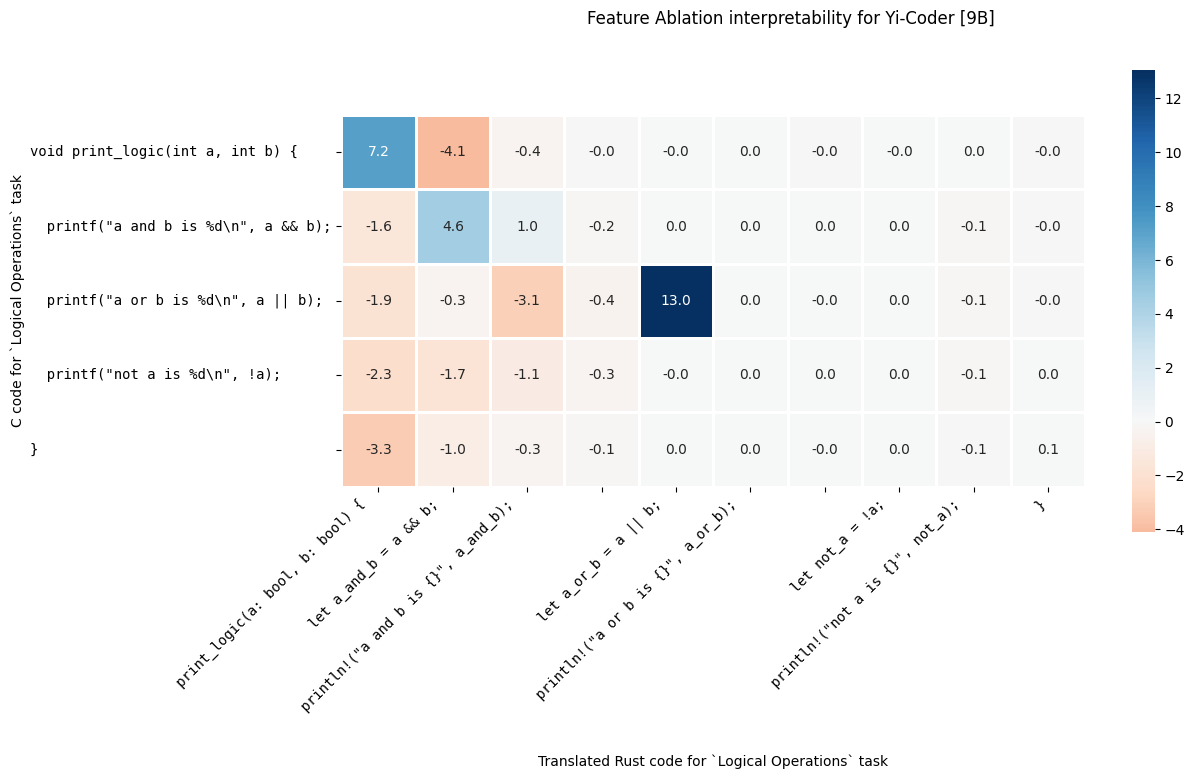

In [11]:
lang1 = list(LANGS.keys())[0]
lang2 = list(LANGS.keys())[6]
input_tokens = None
filename = f"{MODEL}-{TASK}-{lang1.lower()}-{lang2.lower()}.json"
filename = os.path.join(INTERPRETABILITY_SOURCE_FOLDER, filename)
results = json.load(open(filename, "r"))
if input_tokens is None:
    max_len = max([len(s) for s in results["input_tokens"]])
    input_tokens = [
        crop_text(s.encode("ascii", errors="ignore").decode(), max_len)
        for s in results["input_tokens"]
    ]
output_tokens = results["output_tokens"]
token_attrs = results["token_attr"]
output_tokens, token_attrs = split_list_by_newline(output_tokens, token_attrs)
output_tokens = [TOKENIZER.convert_tokens_to_string(x) for x in output_tokens]
data = pd.DataFrame(token_attrs).T
data.columns = output_tokens
data.index = input_tokens
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
_ = sns.heatmap(
    data,
    center=0,
    robust=ROBUST,
    cmap=CMAP,
    annot=True,
    fmt=".1f",
    linewidths=1,
    square=True,
    ax=ax,
)
_ = ax.set_xlabel(f"Translated {LANGS[lang2]} code for `{TASKS[TASK]}` task")
_ = ax.set_xticklabels(
    ax.get_xticklabels(), fontproperties=MONOSPACE, rotation=45, ha="right"
)
_ = ax.set_ylabel(f"{LANGS[lang1]} code for `{TASKS[TASK]}` task")
_ = ax.set_yticklabels(ax.get_yticklabels(), fontproperties=MONOSPACE)
fig.suptitle(
    f"{snake_to_capitalize(INTERPRETABILITY)} interpretability for {MODELS[MODEL]}"
)
print(data.iloc[0].values.sum())